In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

In [116]:
# Automatic brightness and contrast optimization with optional histogram clipping
def automatic_brightness_and_contrast(image, clip_hist_percent=1):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Calculate grayscale histogram
    hist = cv2.calcHist([gray],[0],None,[256],[0,256])
    hist_size = len(hist)
    
    # Calculate cumulative distribution from the histogram
    accumulator = []
    accumulator.append(float(hist[0]))
    for index in range(1, hist_size):
        accumulator.append(accumulator[index -1] + float(hist[index]))
    
    # Locate points to clip
    maximum = accumulator[-1]
    clip_hist_percent *= (maximum/100.0)
    clip_hist_percent /= 2.0
    
    # Locate left cut
    minimum_gray = 0
    while accumulator[minimum_gray] < clip_hist_percent:
        minimum_gray += 1
    
    # Locate right cut
    maximum_gray = hist_size -1
    while accumulator[maximum_gray] >= (maximum - clip_hist_percent):
        maximum_gray -= 1
    
    # Calculate alpha and beta values
    alpha = 255 / (maximum_gray - minimum_gray)
    beta = -minimum_gray * alpha
    
    '''
    # Calculate new histogram with desired range and show histogram 
    new_hist = cv2.calcHist([gray],[0],None,[256],[minimum_gray,maximum_gray])
    plt.plot(hist)
    plt.plot(new_hist)
    plt.xlim([0,256])
    plt.show()
    '''

    auto_result = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return (auto_result, alpha, beta)

In [117]:
data_path = "../imgs/imgs_sel/"

In [118]:
image_path_1 = data_path + "tartaruga1A.JPG"
image_path_2 = data_path + "tartaruga1B.JPG"
image_path_3 = data_path + "tartaruga2.JPG"

In [135]:
def treat_image(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.GaussianBlur(img_gray, (3, 3), 0)
    # img_gray = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 4)
    img_gray = cv2.Canny(img_gray, 30, 150, 7, L2gradient = True)
    return img_gray

Match entre 1 e 2: 0.35533912503948795
Match entre 1 e 3: 0.04272835513917106
Match entre 2 e 3: 0.16979997062446395


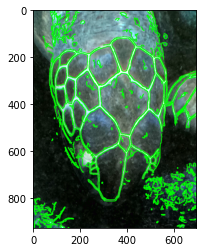

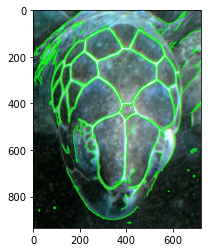

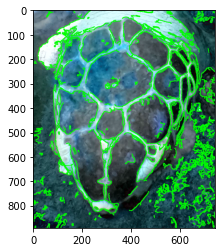

In [139]:
img1 = cv2.imread(image_path_1)
img1, alpha, beta = automatic_brightness_and_contrast(img1)
img_gray1 = treat_image(img1)

img2 = cv2.imread(image_path_2)
img2, alpha, beta = automatic_brightness_and_contrast(img2)
img_gray2 = treat_image(img2)

img3 = cv2.imread(image_path_3)
img3, alpha, beta = automatic_brightness_and_contrast(img3)
img_gray3 = treat_image(img3)


contours1, hierarchy1 = cv2.findContours(img_gray1, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
contours2, hierarchy2 = cv2.findContours(img_gray2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
contours3, hierarchy3 = cv2.findContours(img_gray3, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)


d2=cv2.matchShapes(img_gray1, img_gray2, cv2.CONTOURS_MATCH_I2, 0)
print("Match entre 1 e 2:", d2)

d3=cv2.matchShapes(img_gray1, img_gray3, cv2.CONTOURS_MATCH_I2, 0)
print("Match entre 1 e 3:", d3)

d4=cv2.matchShapes(img_gray2, img_gray3, cv2.CONTOURS_MATCH_I2, 0)
print("Match entre 2 e 3:", d4)


cv2.drawContours(img1, contours1, -1, (0, 255, 0), 2)
plt.imshow(img1)
plt.show()

cv2.drawContours(img2, contours2, -1, (0, 255, 0), 2)
plt.imshow(img2)
plt.show()

cv2.drawContours(img3, contours3, -1, (0, 255, 0), 2)
plt.imshow(img3)
plt.show()